In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import config as cnf
import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from lightgbm import LGBMClassifier

c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [2]:
data = pd.read_csv("heart.csv")

In [4]:
utils.first_edit(data)

In [5]:
utils.analyse_dataset(data)

########## SHAPE ##########
(303, 14)
########## DTYPES ##########
AGE           int64
SEX           int64
CP            int64
TRESTBPS      int64
CHOL          int64
FBS           int64
RESTECG       int64
THALACH       int64
EXANG         int64
OLDPEAK     float64
SLOPE         int64
CA            int64
THAL          int64
TARGET        int64
dtype: object
########## HEAD ##########
   AGE  SEX  CP  TRESTBPS  CHOL  FBS  RESTECG  THALACH  EXANG  OLDPEAK  SLOPE  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   CA  THAL  TARGET  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2    

In [6]:
cat_cols, num_cols = utils.grab_dataset(data)

Observations: 303
Variables: 14
cat_cols: 9
num_cols: 5
cat_but_car: 0
num_but_cat: 9


In [7]:
print("########## Cat Cols ##########")
print(cat_cols)
print("########## Num Cols ##########")
print(num_cols)

########## Cat Cols ##########
['SEX', 'CP', 'FBS', 'RESTECG', 'EXANG', 'SLOPE', 'CA', 'THAL', 'TARGET']
########## Num Cols ##########
['AGE', 'TRESTBPS', 'CHOL', 'THALACH', 'OLDPEAK']


In [8]:
for i in num_cols:
    print(f"{i} cols threshold values : {utils.outlier_thresholds(data,i)}")

AGE cols threshold values : (-4.249999999999993, 111.35)
TRESTBPS cols threshold values : (30.0, 238.0)
CHOL cols threshold values : (-52.849999999999966, 554.75)
THALACH cols threshold values : (-2.59999999999998, 292.59999999999997)
OLDPEAK cols threshold values : (-5.1, 8.5)


In [9]:
for i in num_cols:
    print(f"{i} cols threshold values : {utils.check_outlier(data,i)}")

AGE cols threshold values : False
TRESTBPS cols threshold values : False
CHOL cols threshold values : True
THALACH cols threshold values : False
OLDPEAK cols threshold values : False


In [10]:
for i in num_cols:
    print(f"{i} cols threshold values : {utils.grab_outliers(data,i, index = True)}")

Empty DataFrame
Columns: [AGE, SEX, CP, TRESTBPS, CHOL, FBS, RESTECG, THALACH, EXANG, OLDPEAK, SLOPE, CA, THAL, TARGET]
Index: []
AGE cols threshold values : Int64Index([], dtype='int64')
Empty DataFrame
Columns: [AGE, SEX, CP, TRESTBPS, CHOL, FBS, RESTECG, THALACH, EXANG, OLDPEAK, SLOPE, CA, THAL, TARGET]
Index: []
TRESTBPS cols threshold values : Int64Index([], dtype='int64')
Empty DataFrame
Columns: [AGE, SEX, CP, TRESTBPS, CHOL, FBS, RESTECG, THALACH, EXANG, OLDPEAK, SLOPE, CA, THAL, TARGET]
Index: []
CHOL cols threshold values : Int64Index([], dtype='int64')
Empty DataFrame
Columns: [AGE, SEX, CP, TRESTBPS, CHOL, FBS, RESTECG, THALACH, EXANG, OLDPEAK, SLOPE, CA, THAL, TARGET]
Index: []
THALACH cols threshold values : Int64Index([], dtype='int64')
Empty DataFrame
Columns: [AGE, SEX, CP, TRESTBPS, CHOL, FBS, RESTECG, THALACH, EXANG, OLDPEAK, SLOPE, CA, THAL, TARGET]
Index: []
OLDPEAK cols threshold values : Int64Index([], dtype='int64')


In [11]:
utils.replace_outliers(data, 'CHOL')

c:\Users\s7522\Desktop\ml_model_with_flask_2\utils.py:169: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe.loc[(dataframe[col_name] > up) | (dataframe[col_name] < down)].any(None):


,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,TARGET
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264.0,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193.0,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131.0,0,1,115,1,1.2,1,1,3,0


In [12]:
for i in num_cols:
    print(f"{i} cols threshold values : {utils.check_outlier(data,i)}")

AGE cols threshold values : False
TRESTBPS cols threshold values : False
CHOL cols threshold values : False
THALACH cols threshold values : False
OLDPEAK cols threshold values : False


In [13]:
for i in num_cols:
    utils.num_summary(data, i)

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
5%        39.100000
10%       42.000000
20%       45.000000
30%       50.000000
40%       53.000000
50%       55.000000
60%       58.000000
70%       59.000000
80%       62.000000
90%       66.000000
95%       68.000000
99%       71.000000
max       77.000000
Name: AGE, dtype: float64
count    303.000000
mean     131.623762
std       17.538143
min       94.000000
5%       108.000000
10%      110.000000
20%      120.000000
30%      120.000000
40%      126.000000
50%      130.000000
60%      134.000000
70%      140.000000
80%      144.000000
90%      152.000000
95%      160.000000
99%      180.000000
max      200.000000
Name: TRESTBPS, dtype: float64
count    303.000000
mean     246.233498
std       51.645379
min      126.000000
5%       175.000000
10%      188.000000
20%      204.000000
30%      217.600000
40%      230.000000
50%      240.000000
60%      254.000000
70%      268.000000
80%      285.200000
90%

c:\Users\s7522\Desktop\ml_model_with_flask_2\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


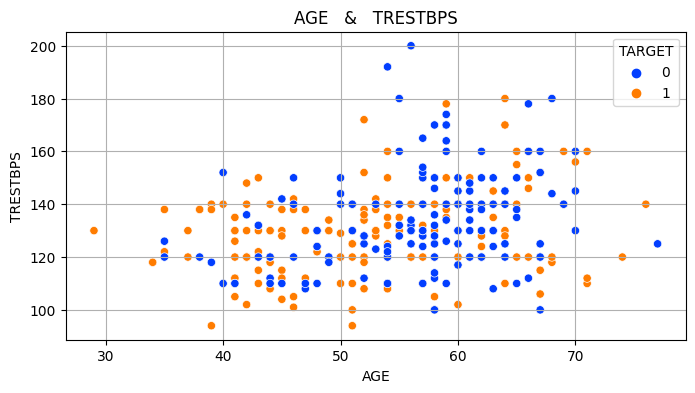

c:\Users\s7522\Desktop\ml_model_with_flask_2\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


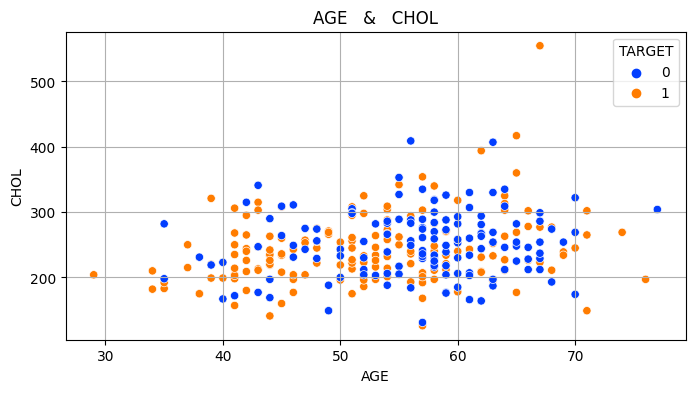

c:\Users\s7522\Desktop\ml_model_with_flask_2\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


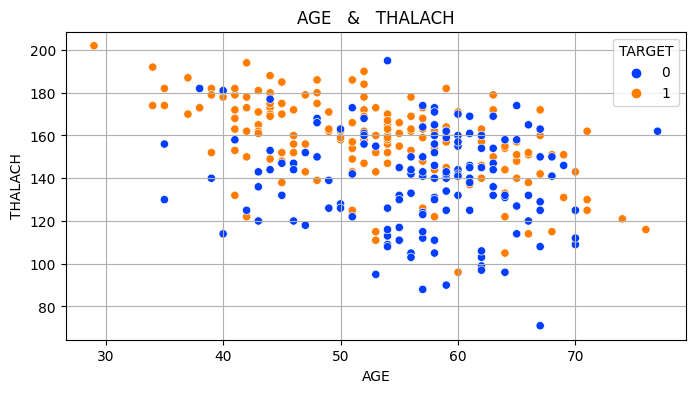

c:\Users\s7522\Desktop\ml_model_with_flask_2\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


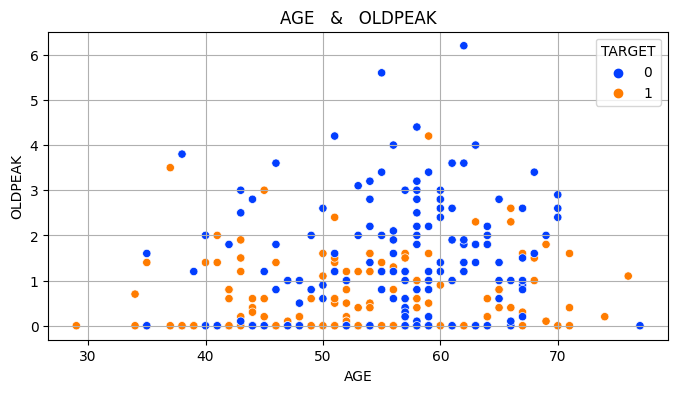

c:\Users\s7522\Desktop\ml_model_with_flask_2\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


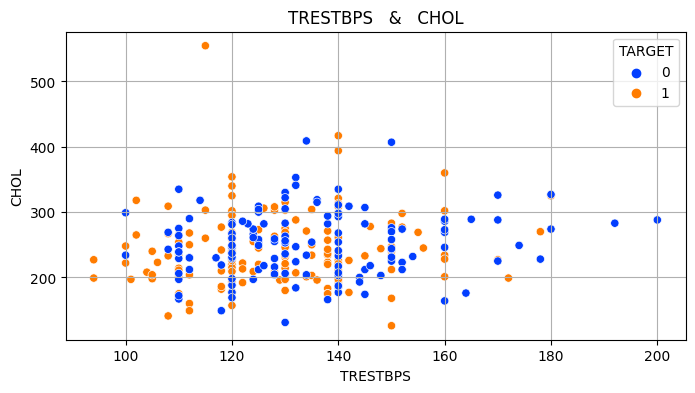

c:\Users\s7522\Desktop\ml_model_with_flask_2\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


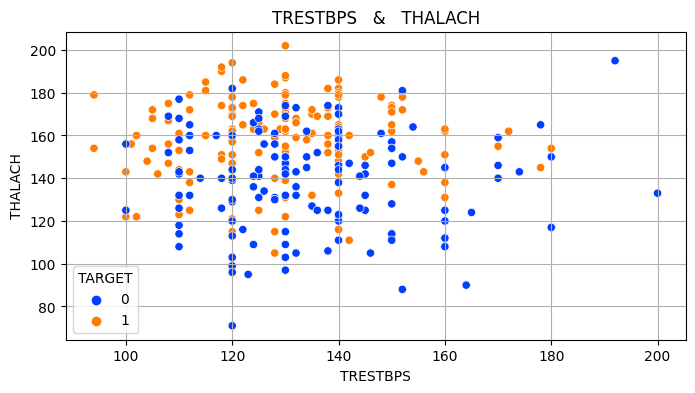

c:\Users\s7522\Desktop\ml_model_with_flask_2\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


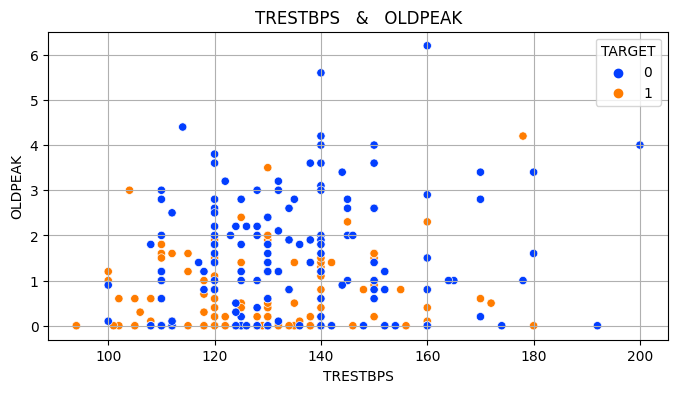

c:\Users\s7522\Desktop\ml_model_with_flask_2\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


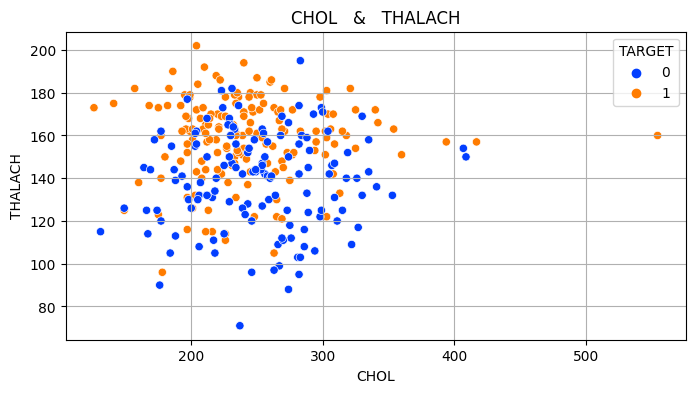

c:\Users\s7522\Desktop\ml_model_with_flask_2\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


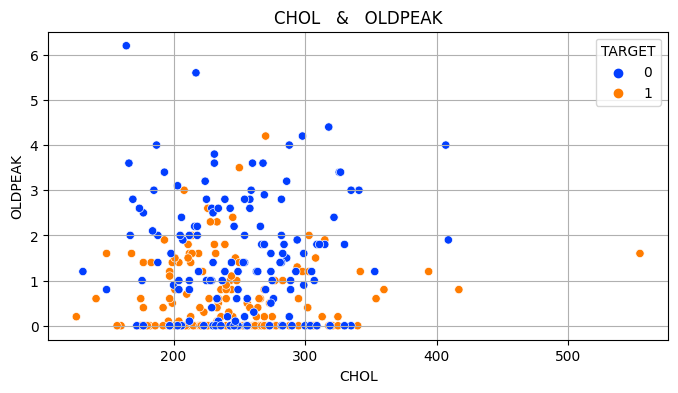

c:\Users\s7522\Desktop\ml_model_with_flask_2\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


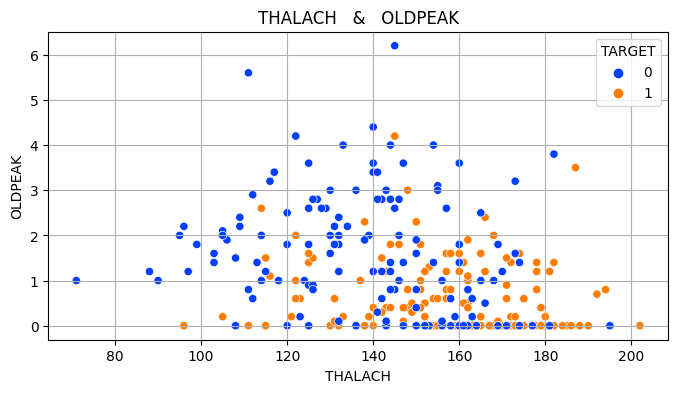

In [14]:
utils.numcols_target_corr(data, num_cols)

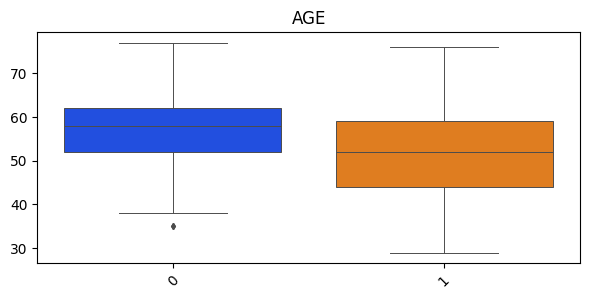

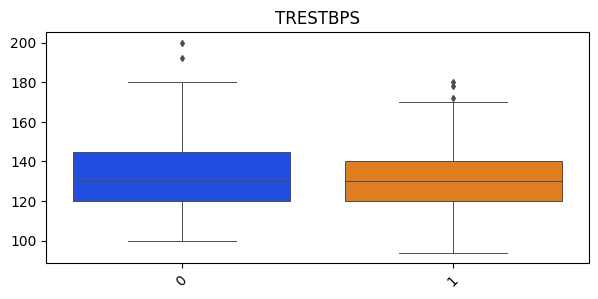

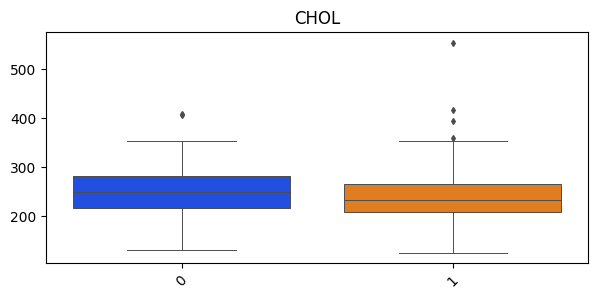

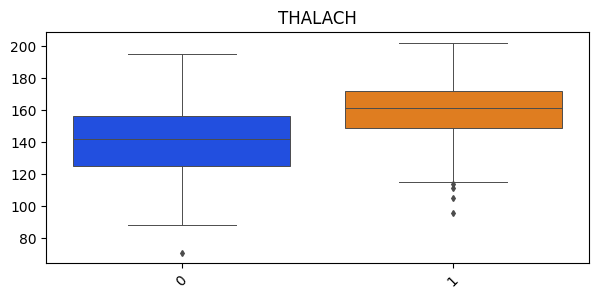

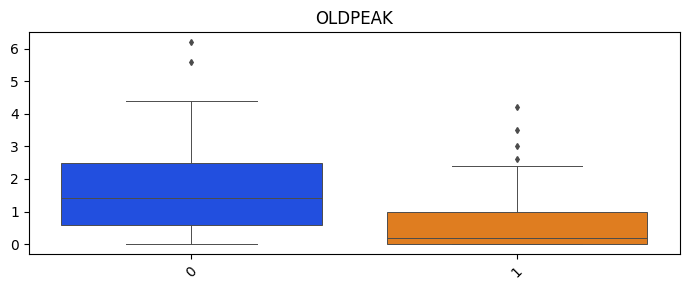

In [15]:
utils.numeric_variables_boxplot(data, num_cols, target = cnf.target )

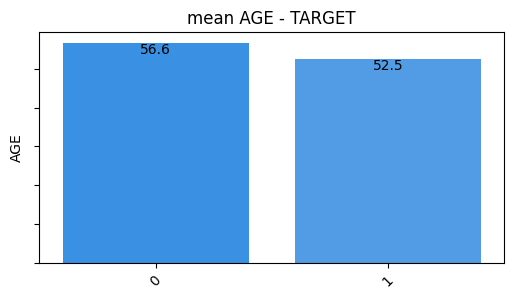

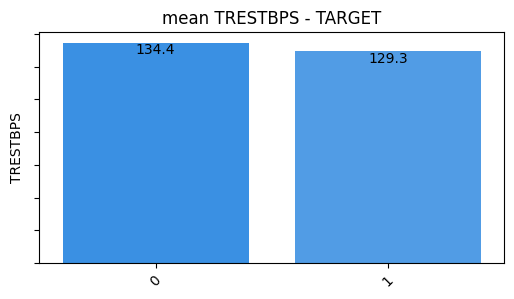

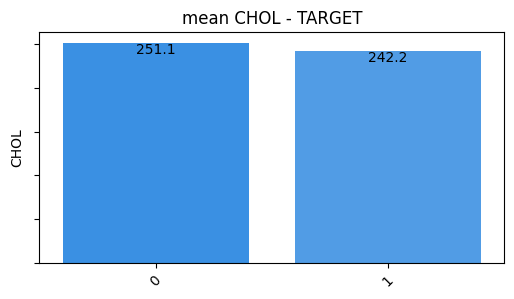

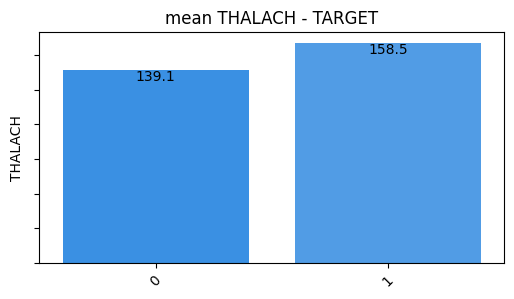

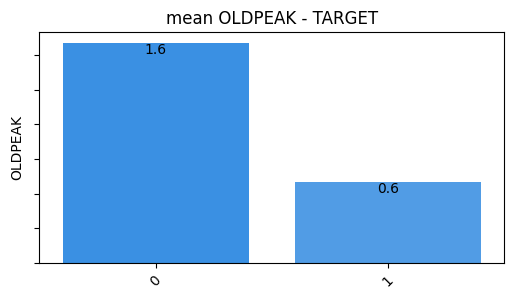

In [16]:
utils.plot_avg_numvars_by_target(data, num_cols)

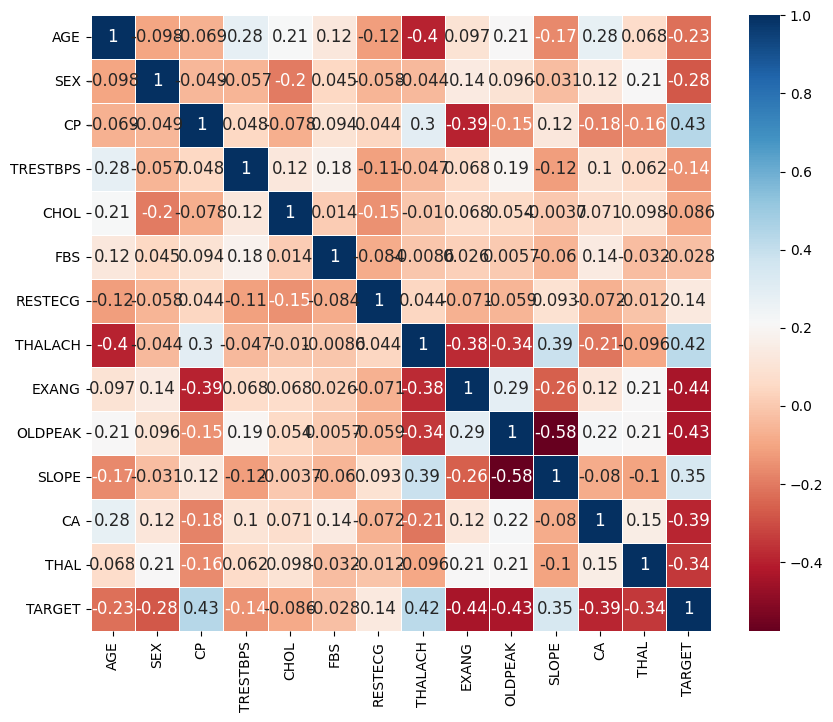

In [17]:
utils.correlation_matrix(data, data.columns)

In [18]:
y = data['TARGET']
data = data.drop(columns = ['TARGET'], axis = 1)

In [19]:
X= data

In [20]:
X = StandardScaler().fit_transform(X)

In [21]:
X = pd.DataFrame(X, columns = data.columns)

In [22]:
X

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL
0,0.952197,0.681005,1.973123,0.763956,-0.256662,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.073051,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.819112,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198477,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.090115,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101503,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.344579,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.032456,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.234936,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [34]:
utils.hyperparameter_optimization(X_train, y_train)

Hyperparameter Optimization....
########## XGBoost ##########
roc_auc (Before): 0.8663


c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encode

roc_auc (After): nan
XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'num_class': 8, 'objective': 'multi:softmax'}

########## LightGBM ##########
roc_auc (Before): 0.863
roc_auc (After): 0.873
LightGBM best params: {'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 500}



{'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.5, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=50, n_jobs=None,
               num_class=8, num_parallel_tree=None, objective='multi:softmax', ...),
 'LightGBM': LGBMClassifier(colsample_bytree=1, learning_rate=0.01, n_estimators=500,
                verbose=-1)}

In [39]:
model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [40]:
pickle.dump(model, open("model.pkl", "wb"))